In [54]:
"""下载股票tabular data"""
import os
import yfinance as yf
from datetime import datetime

msft = yf.Ticker("MSFT")
t0 = datetime(1986, 3, 13).strftime('%Y-%m-%d')  # 微软IPO日期
t1 = datetime(2022, 3, 24).strftime('%Y-%m-%d')  # 今天的日期，格式为YYYY-MM-DD
print(f"下载MSFT从 {t0} 到 {t1} 的股票数据")
hist_data = msft.history(start=t0, end=t1, interval="1d")
print(hist_data.tail(10))
# 保存到CSV文件
DATA_DIR = '../../data/'
csv_filename = f"MSFT_from_{t0.replace('-', '')}_to_{t1.replace('-', '')}.csv"
print(f"保存数据表格名：{csv_filename}")
hist_data.to_csv(os.path.join(DATA_DIR, csv_filename))

下载MSFT从 1986-03-13 到 2022-03-24 的股票数据
                                 Open        High         Low       Close  \
Date                                                                        
2022-03-10 00:00:00-05:00  275.882652  279.372387  273.504183  278.387848   
2022-03-11 00:00:00-05:00  280.698060  282.208989  272.383175  273.007050   
2022-03-14 00:00:00-04:00  273.270239  278.202631  268.864238  269.468597   
2022-03-15 00:00:00-04:00  273.280006  280.561625  271.700865  279.908508   
2022-03-16 00:00:00-04:00  281.819067  287.141396  276.058135  286.965942   
2022-03-17 00:00:00-04:00  285.893673  288.155143  282.072516  287.774994   
2022-03-18 00:00:00-04:00  287.921185  293.409209  285.347778  292.853577   
2022-03-21 00:00:00-04:00  291.352481  292.570958  287.463083  291.615662   
2022-03-22 00:00:00-04:00  292.239511  297.308387  291.235487  296.392090   
2022-03-23 00:00:00-04:00  292.931613  295.583020  290.211964  291.937317   

                             Volume  

In [1]:
# https://www.youtube.com/watch?v=CbTU92pbDKw
import pandas as pd
df = pd.read_csv('../../data/MSFT_from_19860313_to_20220324.csv')
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], utc=True).dt.strftime('%Y-%m-%d')
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
9077,2022-03-17,285.893673,288.155143,282.072516,287.774994,30816600,0.0,0.0
9078,2022-03-18,287.921185,293.409209,285.347778,292.853577,43390600,0.0,0.0
9079,2022-03-21,291.352481,292.570958,287.463083,291.615662,28351200,0.0,0.0
9080,2022-03-22,292.239511,297.308387,291.235487,296.392090,27599700,0.0,0.0
9081,2022-03-23,292.931613,295.583020,290.211964,291.937317,25715400,0.0,0.0


In [2]:
price_df = df[['Date', 'Close']]
price_df.index = price_df.pop('Date')
price_df.head()

,Close
Date,
1986-03-13,0.059707
1986-03-14,0.061839
1986-03-17,0.062906
1986-03-18,0.061306
1986-03-19,0.060240


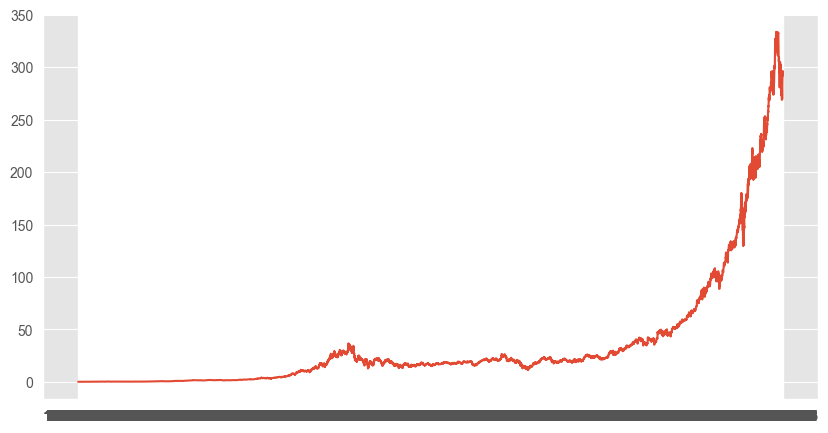

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(price_df.index, price_df['Close'], label='MSFT')
plt.show()

C:\Users\SchrodingerFeiFei\AppData\Local\Temp\ipykernel_31192\3258983683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Date'] = price_df['Date'].apply(lambda x: x.to_pydatetime())


Timestamp('1986-03-13 00:00:00')